# Examen Final
Autora: Sara Bengoechea Rodríguez

## Metadatos

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

## Inicializar y cargar el contexto spark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()
from pyspark import SparkContext 
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession 
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
from pyspark.sql import *
from pyspark.sql import SQLContext, functions as F, Row
from pyspark.sql.types import *
from pyspark.sql.types import StringType, IntegerType

Importamos la base de datos

In [7]:
rdd_data_raw = sc.textFile("BDpracticafinalCSV.csv")
header_rdd_data_raw = rdd_data_raw.take(1)

In [8]:
rdd_data_raw.take(5)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000']

In [9]:
rdd_data_raw = rdd_data_raw.map(lambda x: x.split(";"))

In [10]:
header_rdd_data_raw

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice']

In [11]:
data_parsed = spark.read.format("csv") \
    .option("sep", ";") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("BDpracticafinalCSV.csv")

data_parsed.show(10)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|    1|      

In [12]:
# visualizamos el esquemas y nos aseguramos que se han importado las variables correctamente.
data_parsed.printSchema()

root
 |-- Order: integer (nullable = true)
 |-- MS Zoning: string (nullable = true)
 |-- Lot Frontage: integer (nullable = true)
 |-- Lot Area: integer (nullable = true)
 |-- Land Contour: string (nullable = true)
 |-- Land Slope: string (nullable = true)
 |-- Overall Qual: integer (nullable = true)
 |-- Year Built: integer (nullable = true)
 |-- Year Remod/Add: integer (nullable = true)
 |-- Mas Vnr Type: string (nullable = true)
 |-- Exter Qual: string (nullable = true)
 |-- Bsmt Cond: string (nullable = true)
 |-- Total Bsmt SF: integer (nullable = true)
 |-- Heating QC: string (nullable = true)
 |-- Central Air: string (nullable = true)
 |-- Full Bath: integer (nullable = true)
 |-- Half Bath: integer (nullable = true)
 |-- Bedroom AbvGr: integer (nullable = true)
 |-- Kitchen AbvGr: integer (nullable = true)
 |-- Kitchen Qual: string (nullable = true)
 |-- TotRms AbvGrd: integer (nullable = true)
 |-- Garage Cars: integer (nullable = true)
 |-- Garage Area: integer (nullable = tru

In [13]:
data_parsed.count()

2936

Filtramos solo para las viviendas ubicadas en zonas residenciales alta, media y baja densidad.

En el diccionario de variables informan que los tipos de viviendas son las siguientes: A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad".

Por lo tanto, podemos filtrar por aquellas viviendas que sean RH, RM o RL

In [14]:
# importamos funciones para poder filtrar
from pyspark.sql.functions import col, avg, desc, sum

In [15]:
data_parsed = data_parsed.filter((F.col("MS zoning") == 'RH') | (F.col("MS zoning") == 'RM') | (F.col("MS zoning") == 'RL'))

In [16]:
data_parsed.count()

2760

In [17]:
data_parsed.show()

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|    1|      

In [18]:
data_parsed.select("Ms Zoning").distinct().show()

+---------+
|Ms Zoning|
+---------+
|       RH|
|       RL|
|       RM|
+---------+



## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Con el resultado obtenido podemos ver que hay 2 duplicados, ya que en el dataset son 2760 observaciones, de las cuales 2758 no tienen duplicados

In [19]:
viviendas_distintas = data_parsed.distinct()
viviendas_distintas.count()

2758

Comprobamos que tienen la misma variable de identificación.

In [20]:
data_parsed.select("Order").distinct().count() 

2758

Como es el caso, podemos procederemos a eliminar los valores duplicados

In [21]:
data_parsed = data_parsed.drop_duplicates()
data_parsed.count()

2758

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

En total hay 2761 inmuebles

In [22]:
data_parsed.count()

2758

Precio medio de cada zona:

In [23]:
data_parsed.groupby('MS Zoning').agg(F.mean('SalePrice')).show()

+---------+------------------+
|MS Zoning|    avg(SalePrice)|
+---------+------------------+
|       RH|136419.77777777778|
|       RL|191142.49933891583|
|       RM|126781.39393939394|
+---------+------------------+



## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

Creamos una nueva columna que indique si se trata de la década del 2000, del 1990 o anterior.

Nota: he agrupado todas las décadas anteriores en una sola debido a que cuando lo observé por año, se apreciaba que estas no eran relevantes.

In [24]:
from pyspark.sql.functions import when

data_parsed = data_parsed.withColumn( "decada", when(col("Year Built") < 1990, "décadas hasta 1899")
  .when(col("Year Built")< 2000, "decada de 1990")
  .otherwise('decada del 2000'))
data_parsed.show()

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+------------------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|            decada|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+--

La Media de Total Bsmt SF por cada década de construcción es la siguiente:

In [25]:
data_parsed.groupby('decada').agg(F.mean('Total Bsmt SF')).show()

+------------------+------------------+
|            decada|avg(Total Bsmt SF)|
+------------------+------------------+
|décadas hasta 1899| 930.9882286995515|
|   decada del 2000|1347.7401812688822|
|    decada de 1990|1138.5608974358975|
+------------------+------------------+



¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

Primero observamos cuáles son los valores que puede tomar la variable Heatin QC:
- Ex: Excelente.
- Gd: Bueno.
- TA Media.
- Fa Justo.
- Po Pobre.


In [26]:
data_parsed.select("Heating QC").distinct().show()

+----------+
|Heating QC|
+----------+
|        Gd|
|        Po|
|        Ex|
|        Fa|
|        TA|
+----------+



Filtramos por aquellas que tengan viviendas acondicionadas con valor "Ex" (Excelente) y ordenamos de mayor a menor.

Con el resultado obtenido se puede concluir que la década con mejor acondicionamiento para el frío es la década del 2000, ya que se construyeron un total de 635 viviendas con acondicionamiento excelente para prevenir el frío, frente a 485 en las anteriores a 1899.

In [27]:
data_parsed.filter(data_parsed["Heating QC"] == "Ex") \
    .groupBy("decada").count() \
    .sort(desc("count")) \
    .show()

+------------------+-----+
|            decada|count|
+------------------+-----+
|   decada del 2000|  637|
|décadas hasta 1899|  485|
|    decada de 1990|  232|
+------------------+-----+



## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Creamos una columna que contenga la información de la superficie en metros cuadrados. Para ello multiplicamos la columuna de "Lot Area", que está en piés cuadrados, por 0.09.

In [28]:
data_processed = data_parsed.withColumn("metro_cuadrado", data_parsed["Lot Area"]* 0.09)
data_processed.show(4)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+------------------+-----------------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|            decada|   metro_cuadrado|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+--------

Calculamos en una nueva columna que contenga el precio por metro cuadrado

In [29]:
data_processed = data_processed.withColumn("Precio_metro_cuadrado", data_processed["SalePrice"]/data_processed["metro_cuadrado"])
data_processed.show(4)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+------------------+-----------------+---------------------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|            decada|   metro_cuadrado|Precio_metro_cuadrado|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+---

Para conocer las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009, filtramos por dicho año y ordenamos de manera descendente:

In [30]:
data_processed.filter(data_processed["Yr Sold"] == 2009) \
    .sort(desc("Precio_metro_cuadrado")) \
    .show(10)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+------------------+------------------+---------------------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|            decada|    metro_cuadrado|Precio_metro_cuadrado|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+-

## Media anual por zonas del precio de venta y metros cuadrados.

A continuación calculamos, para cada zona, la media de su precio de venta, la media de los metros cuadrados y la media del precio por precio cuadrado.

In [31]:
data_processed.groupBy("MS Zoning").agg(F.mean("SalePrice"), F.mean("metro_cuadrado"), F.mean("Precio_metro_cuadrado")).show()

+---------+------------------+-------------------+--------------------------+
|MS Zoning|    avg(SalePrice)|avg(metro_cuadrado)|avg(Precio_metro_cuadrado)|
+---------+------------------+-------------------+--------------------------+
|       RH|136419.77777777778|  662.5999999999998|        233.79506498176403|
|       RL|191142.49933891583| 1002.8399338915821|        217.16537099441064|
|       RM|126781.39393939394|  577.0348051948056|         291.2856581401739|
+---------+------------------+-------------------+--------------------------+



## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

Primero estudiamos las posibles opciones de revistimiento de las viviendas.

In [32]:
data_parsed.select("Mas Vnr Type").distinct().show()

+------------+
|Mas Vnr Type|
+------------+
|        None|
|      BrkCmn|
|        null|
|       Stone|
|     BrkFace|
|      CBlock|
+------------+



Recaudación total de las viviendas de piedra

In [33]:
data_processed.filter(data_processed["Mas Vnr Type"] == "Stone") \
    .select(sum("SalePrice")) \
    .show()

+--------------+
|sum(SalePrice)|
+--------------+
|      59855477|
+--------------+



Calculamos la recaudación media de las casas de piedra para posteriormente poder comparar

In [34]:
data_processed.filter(data_processed["Mas Vnr Type"] == "Stone") \
    .select(F.mean("SalePrice")) \
    .show()

+------------------+
|    avg(SalePrice)|
+------------------+
|262524.02192982455|
+------------------+



Total de recaudación de las viviendas de ladrillo

In [35]:
data_processed.where(col("Mas Vnr Type").like("%Brk%")) \
    .select(sum("SalePrice")) \
    .show()

+--------------+
|sum(SalePrice)|
+--------------+
|     182105036|
+--------------+



Recaudación media de las viviendas de ladrillo

In [36]:
data_processed.where(col("Mas Vnr Type").like("%Brk%")) \
    .select(F.mean("SalePrice")) \
    .show()

+-----------------+
|   avg(SalePrice)|
+-----------------+
|208836.0504587156|
+-----------------+



Las casas de piedra, son en promedio 53,687.97 dólares más caras, por lo que podríamos concluir que sí existe una diferencia significativa entre las viviendas de ladrillo y las de piedra.

In [37]:
262524.02 - 208836.05

53687.97000000003

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

In [38]:
# Precio medio de las viviendas con dos cocinas y 2 o más garajes
data_processed.filter(data_processed["Kitchen AbvGr"] == 2) \
    .filter(data_processed["Garage Cars"] > 1)  \
    .select(F.mean("SalePrice")) \
    .show()

+------------------+
|    avg(SalePrice)|
+------------------+
|145124.27906976745|
+------------------+



In [39]:
# Precio medio de las viviendas con una cocinas y un garaje
data_processed.filter(data_processed["Kitchen AbvGr"] == 1) \
    .filter(data_processed["Garage Cars"] == 1)  \
    .select(F.mean("SalePrice")) \
    .show()

+------------------+
|    avg(SalePrice)|
+------------------+
|128121.99337748345|
+------------------+



En promedio, las viviendas que tienen dos cocinas y dos o más plazas de garaje, cuestan 17,002.29 dólares más que aquellas con solo una cocina y una plaza de garaje

In [40]:
145124.28 - 128121.99

17002.289999999994

Para poder calcular los cuartiles, creamos un dataframe que contenga solo aquellas viviendas con 2 cocinas y con 2 garajes o más.

In [41]:
data_big = data_processed.filter(data_processed["Kitchen AbvGr"] == 2)
data_big = data_big.filter(data_processed["Garage Cars"] > 1)
data_big.count()

86

In [42]:
data_big.show(3)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+------------------+--------------+---------------------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|            decada|metro_cuadrado|Precio_metro_cuadrado|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+---------

Primer cuartil:

In [43]:
data_big.approxQuantile("SalePrice", [0.25], 0)

[118964.0]

La mediana es de 141,000 dólares. Esta es ligeramente más baja que la media por cerca de 4,000 dólares. 

In [44]:
data_big.approxQuantile("SalePrice", [0.5], 0)

[141000.0]

El tercer cuartil:

In [45]:
data_big.approxQuantile("SalePrice", [0.75], 0)

[159000.0]

El Precio de venta máximo de las viviendas con 2 cocinas y más de 2 garajes es el siguiente:

In [46]:
data_big.agg(F.max("SalePrice")).show()

+--------------+
|max(SalePrice)|
+--------------+
|        269500|
+--------------+



Hacemos lo mismo para el segundo tipo de viviendas:

In [47]:
data_small = data_processed.filter(data_processed["Kitchen AbvGr"] == 1)
data_small = data_small.filter(data_processed["Garage Cars"] == 1)
data_small.count()

755

In [48]:
data_small.show(3)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+------------------+-----------------+---------------------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|            decada|   metro_cuadrado|Precio_metro_cuadrado|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+---

Primer cuartil:

In [49]:
data_small.approxQuantile("SalePrice", [0.25], 0)

[111500.0]

La diferencia entre la media y la mediana es muy pequeña.

In [50]:
data_small.approxQuantile("SalePrice", [0.50], 0)

[128000.0]

Tercer cuartil

In [51]:
data_small.approxQuantile("SalePrice", [0.75], 0)

[142125.0]

Precio de venta máximo:

In [52]:
data_small.agg(F.max("SalePrice")).show()

+--------------+
|max(SalePrice)|
+--------------+
|        330000|
+--------------+



Es destacable que en el dataset hay 87 viviendas con 2 cocinas y 2 o más plazad de garaje, frente a 769 con una cocina y una plaza de garaje. De media hemos visto que el primer tipo tienen un precio de venta mayor. Si comparamos para cada cuartil, también se cumple que sea mayor el precio del primer tio de vivienda.

Aunque para cada cuartil, a medida que aumenta también aumenta la diferencia de precio entre ambos tipos de vivienda, si atendemos al valor máximo, llama la atención que la vivienda con el precio mayor pertence a una con un solo garaje y cocina.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Si atendendemos al gráfico que se muestra a continuación, podemos ver cómo a medida que aumenta el número de garajes aumenta la dispersión en el precio. Excepto cuando el número de garajes es superior a 3. Además existe un valor atípico de una vivienda con 5 garajes.

Se puede intuir que sí hay una correlación (en promedio) cuando comparamos entre 0 y 3 garajes, aunque esta no es clara.

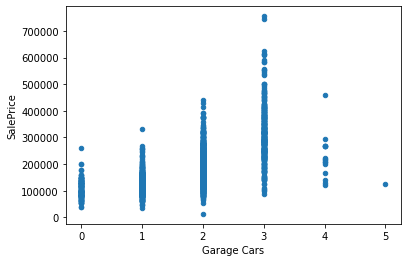

In [53]:
import pandas as pd
    
pandas_dataset = data_processed.toPandas()

pandas_dataset.plot.scatter(x="Garage Cars", y="SalePrice");

## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta